In [1]:
# Data Manipulations
import numpy as np
import pandas as pd

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# to prevent annoying warnings
import warnings
warnings.filterwarnings('ignore')

# set seaborn as default style
sns.set()

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)


In [2]:
def format_float(value):
    return f'{value:,.2f}'

# pd.options.display.float_format = format_float

In [3]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        df -- dataframe
        bytes_data --  column with bytes values
    """
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

In [4]:
df = pd.read_csv('data/Task1.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Download and Upload,Total Session Social Media,Total Session Email,Total Session Youtube,Total Session Netflix,Total Session Google,Total Session Gaming,Total Session Other,Total duration all session,xDR Session,session duration
0,1.311450e+19,04/04/2019 12:01,770.0,25/04/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,1570185.0,3701304.0,18355943.0,17855187.0,2905912.0,292426453.0,180558843.0,5.173738e+08,2,2083209.0
1,1.311450e+19,09/04/2019 13:04,235.0,25/04/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,1933278.0,937385.0,39359124.0,35565545.0,4414096.0,609920783.0,541959383.0,1.234090e+09,2,1698167.0
2,1.311450e+19,09/04/2019 17:42,1.0,25/04/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,1726277.0,3363124.0,34425237.0,23751202.0,10229119.0,229980251.0,414908351.0,7.183836e+08,1,1361762.0
3,1.311450e+19,10/04/2019 0:31,486.0,25/04/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,657493.0,2070983.0,36534765.0,15092588.0,11811761.0,810387875.0,761837216.0,1.638393e+09,1,1321509.0
4,1.311450e+19,12/04/2019 20:10,565.0,25/04/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,

In [5]:
# the data will need alot of cleaning maybe not so much 
# let get started

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # dtype of missing values
        mis_val_dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

Your selected dataframe has 66 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130253,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111842,74.6,float64
Nb of sec with 125000B < Vol DL,97537,65.0,float64
TCP UL Retrans. Vol (Bytes),96648,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93585,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92893,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88316,58.9,float64
TCP DL Retrans. Vol (Bytes),88145,58.8,float64
HTTP UL (Bytes),81809,54.5,float64
HTTP DL (Bytes),81473,54.3,float64


**Fix Outliers**

Since we are to replace all outliers with medians for analysis purposes so we dont lose data. I wrote a function to do that by replacing all outliers values in a column greater than 95% with the median of that column

In [7]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95),
                                        df[column].median(),
                                        df[column])
    return df[column]

In [8]:
df['TCP DL Retrans. Vol (Bytes)'] = fix_outlier(df, 'TCP DL Retrans. Vol (Bytes)')
df['TCP UL Retrans. Vol (Bytes)'] = fix_outlier(df, 'TCP DL Retrans. Vol (Bytes)')
df['Avg Bearer TP DL (kbps)'] = fix_outlier(df, 'Avg Bearer TP DL (kbps)')
df['Avg Bearer TP UL (kbps)'] = fix_outlier(df, 'Avg Bearer TP UL (kbps)')
df['Avg RTT DL (ms)'] = fix_outlier(df, 'Avg RTT DL (ms)')
df['Avg RTT UL (ms)'] = fix_outlier(df, 'Avg RTT UL (ms)')
df['Total Download and Upload'] = fix_outlier(df, 'Total Download and Upload')
df['Total duration all session'] = fix_outlier(df, 'Total duration all session')

In [9]:
# get all columns that are bytes and convert into megabytes
# bytes_columns = list(df.columns[df.columns.str.contains('Bytes')])
# for bytes_column in bytes_columns:
#     df[bytes_column] = convert_bytes_to_megabytes(df, bytes_column)


In [10]:
# Outlier Identification  and dropping
print(df.shape)
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
print(df_out.shape)

(150000, 66)
(66520, 66)


In [11]:
upper_q = df['TCP DL Retrans. Vol (Bytes)'].describe()['75%']
lower_q = df['TCP DL Retrans. Vol (Bytes)'].describe()['25%']
iqr = upper_q - lower_q
upper_whisker = upper_q + 1.5*iqr
# median = df['TCP DL Retrans. Vol (Bytes)'].median()
# std = df['TCP DL Retrans. Vol (Bytes)'].std()
# outliers = (df['TCP DL Retrans. Vol (Bytes)'] - median.abs() > std)
# df[outliers] = np.nan
# df['TCP DL Retrans. Vol (Bytes)'].fillna(median, inplace=True)

print(df.shape)
df1 = df[df['TCP DL Retrans. Vol (Bytes)'] < upper_whisker]
print(df1.shape)

(150000, 66)
(54013, 66)


# User Engagement Analysis
> How often do customers use diffrent apps? <br>
> What is the average usage of apps per customer per app

>> Session Frequncy is the count of times each customer logged in or use an application 

In [12]:
print('The total number of Unique Customer in our data is', df['MSISDN/Number'].nunique())

The total number of Unique Customer in our data is 106856


In [13]:
df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Frequency xDR sessions').\
            sort_values(by='Frequency xDR sessions', ascending=False)[:10]

,MSISDN/Number,Frequency xDR sessions
13526,3.362632e+10,1083
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
76363,3.367588e+10,15
65118,3.366716e+10,13
13994,3.362708e+10,12
1279,3.360452e+10,12
92577,3.376041e+10,12


The 3 engagement metrics are `Total Download and Upload`, `xDr Session` and `Session duration`

## Task 2.1

>> Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [14]:
df_eng_metrics = df[['MSISDN/Number', 'Total Download and Upload', 'xDR Session', 'session duration']]
df_eng_metrics.head()

,MSISDN/Number,Total Download and Upload,xDR Session,session duration
0,3.366496e+10,345629377.0,2,2083209.0
1,3.368185e+10,707185356.0,2,1698167.0
2,3.376063e+10,307690973.0,1,1361762.0
3,3.375034e+10,496861101.5,1,1321509.0
4,3.369980e+10,607681403.0,1,1089009.0


### Top 10 CUstomers based on Aggregated values of Metrics

**Top 10 by Session Duration**

In [15]:
eng_metrics = df_eng_metrics.groupby('MSISDN/Number')[['Total Download and Upload', 'xDR Session',
                                         'session duration']].sum().reset_index()
top_10_session = eng_metrics[['MSISDN/Number', 'session duration']].sort_values(by='session duration',ascending=False)[:10]
top_10_session

,MSISDN/Number,session duration
13526,3.362632e+10,8.798110e+10
13180,3.362578e+10,3.154138e+08
6437,3.361489e+10,1.694373e+08
92923,3.376054e+10,1.391915e+08
65118,3.366716e+10,1.136839e+08
666,3.360313e+10,7.545313e+07
76363,3.367588e+10,7.298920e+07
37052,3.365973e+10,6.456685e+07
92577,3.376041e+10,6.386000e+07
1279,3.360452e+10,6.249588e+07


**Top 10 User by Download and Upload**

In [16]:
top_10_dl_ul = eng_metrics[['MSISDN/Number', 'Total Download and Upload']].sort_values(by='Total Download and Upload',ascending=False)[:10]
top_10_dl_ul

,MSISDN/Number,Total Download and Upload
13526,3.362632e+10,5.167961e+11
92923,3.376054e+10,8.514774e+09
76363,3.367588e+10,7.891111e+09
13180,3.362578e+10,7.708153e+09
6437,3.361489e+10,7.601873e+09
37052,3.365973e+10,6.932144e+09
63028,3.366646e+10,6.530860e+09
57241,3.366471e+10,6.472725e+09
86455,3.369879e+10,6.149693e+09
30715,3.365836e+10,6.051459e+09


**Top 10 User by xDr Session aka Frequency**

In [17]:
eng_metrics[['MSISDN/Number', 'xDR Session']].sort_values(by='xDR Session',ascending=False)[:10]

,MSISDN/Number,xDR Session
13526,3.362632e+10,1172889
13180,3.362578e+10,289
6437,3.361489e+10,289
37052,3.365973e+10,256
92923,3.376054e+10,225
76363,3.367588e+10,225
65118,3.366716e+10,169
13994,3.362708e+10,144
1279,3.360452e+10,144
92577,3.376041e+10,144


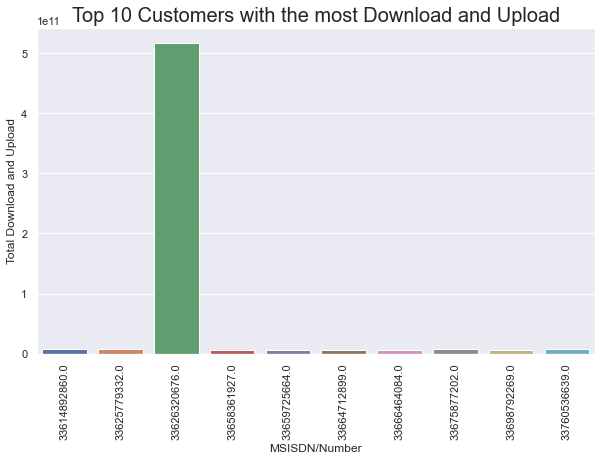

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_dl_ul, x= 'MSISDN/Number', y='Total Download and Upload')
plt.title('Top 10 Customers with the most Download and Upload', size=20)
plt.xticks(rotation=90)
plt.show()

>> Normalize each engagement metric and run a k-means (k=3) to classify                     
customers in three groups of engagement. 

In [19]:
# 1. Normalize the metrics using sklearn's normalization class
# from sklearn.preprocessing import Normalizer
# normal = Normalizer()

df_metrics1 = df_eng_metrics.drop('MSISDN/Number', axis=1)
df_metrics_norm = (
        (df_metrics1 - df_metrics1.min()) 
            /
        (df_metrics1.max() - df_metrics1.min())
                  )


In [20]:
# run a k-means (k=3)
from sklearn.cluster import KMeans
kmeans = KMeans(init="k-means++",  n_clusters=3, random_state=42)
kmeans.fit(df_metrics_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [21]:
centroids_eng = kmeans.cluster_centers_
centroids_eng

array([[7.34511083e-01, 7.89344087e-04, 2.54226368e-03],
       [2.77810111e-01, 7.97274091e-04, 2.54229281e-03],
       [5.29602656e-01, 1.00000000e+00, 1.00000000e+00]])

In [22]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_metrics1.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

>> Compute the minimum, maximum, average & total non- normalized metrics for                     
each cluster. Interpret your results visually with accompanying text

In [23]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).agg(['min', 'max', 'mean', 'sum'])
df_segm_analysis

Total Download and Upload                             \
                                      min          max          mean   
Segment K-means                                                        
0                             457354533.0  875313739.0  6.508386e+08   
1                              28956107.0  457348129.0  2.643515e+08   
2                              64615748.0  873407674.0  4.771894e+08   

                              xDR Session                              \
                          sum         min   max         mean      sum   
Segment K-means                                                         
0                5.298542e+13           1    17     1.854172   150950   
1                1.784532e+13           1    17     1.862516   125731   
2                5.167961e+11        1083  1083  1083.000000  1172889   

                session duration                                          
                             min         max          mean           sum  
Segment K-means                                                           
0                         7142.0  18553754.0  2.136989e+05  1.739744e+10  
1                         7189.0  18553754.0  2.136001e+05  1.441929e+10  
2                     81238323.0  81238323.0  8.123832e+07  8.798110e+10

**Mean for each cluster**

In [24]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Total Download and Upload,xDR Session,session duration
Segment K-means,,,
0,6.508386e+08,1.854172,2.136989e+05
1,2.643515e+08,1.862516,2.136001e+05
2,4.771894e+08,1083.000000,8.123832e+07


On Average, Cluster 0 has the highest value of total download and upload $7.065*10^8$. Cluster 0 consume the most data volume, while Cluster 2 has the highest number for xDR Sessions *1083* as well as the Session Duration with $8.124*10^7$. This implies that customers in cluster 2 spends most time using one application or the other.

**Minimum for each cluster**

In [25]:
# Calculate min values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).min()
df_segm_analysis

,Total Download and Upload,xDR Session,session duration
Segment K-means,,,
0,457354533.0,1,7142.0
1,28956107.0,1,7189.0
2,64615748.0,1083,81238323.0


The least xDR Session occured in cluster 0 and 1, they also has the least amount of session duration.

**Maximum for each cluster**

In [26]:
# Calculate max values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).max()
df_segm_analysis

,Total Download and Upload,xDR Session,session duration
Segment K-means,,,
0,875313739.0,17,18553754.0
1,457348129.0,17,18553754.0
2,873407674.0,1083,81238323.0


Cluster 0 has the highest number for Total Download and Upload but cluster 2 has the highest value for session duration and xDR session

**Sum total for each cluster**

In [27]:
# Calculate sum values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).sum()
df_segm_analysis

,Total Download and Upload,xDR Session,session duration
Segment K-means,,,
0,5.298542e+13,150950,1.739744e+10
1,1.784532e+13,125731,1.441929e+10
2,5.167961e+11,1172889,8.798110e+10


In [28]:
# Compute the size and proportions of the three clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'xDR Session']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [29]:
df_segm_analysis

,Total Download and Upload,xDR Session,session duration,N Obs,Prop Obs
Segment K-means,,,,,
0,5.298542e+13,150950,1.739744e+10,81411,0.54274
1,1.784532e+13,125731,1.441929e+10,67506,0.45004
2,5.167961e+11,1172889,8.798110e+10,1083,0.00722


Many of the customers are grouped or clustered in cluster 0 and 1

In [30]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         })

,Total Download and Upload,xDR Session,session duration,N Obs,Prop Obs
Segment K-means,,,,,
well-off,5.298542e+13,150950,1.739744e+10,81411,0.54274
fewer-opportunities,1.784532e+13,125731,1.441929e+10,67506,0.45004
standard,5.167961e+11,1172889,8.798110e+10,1083,0.00722


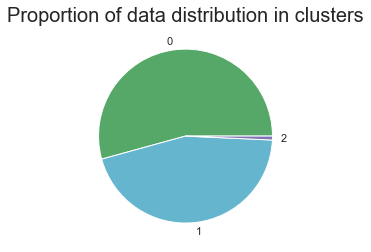

In [31]:
plt.pie(df_segm_analysis['N Obs'], labels=df_segm_analysis.index, colors=['g', 'c', 'm'])
plt.title('Proportion of data distribution in clusters', size=20)
plt.show()

In [32]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  })

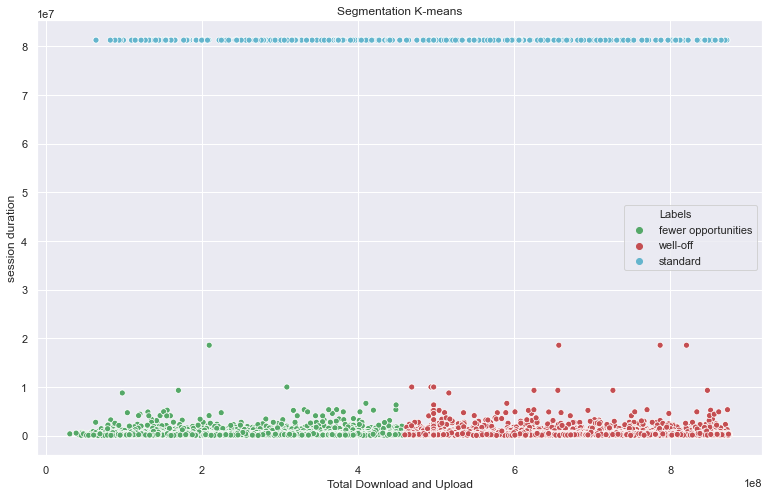

In [33]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
test = df_segm_kmeans.sample(40000)
x_axis = test['Total Download and Upload']
y_axis = test['session duration']
plt.figure(figsize = (13, 8))
sns.scatterplot(x_axis, y_axis, hue = test['Labels'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

We can say that Standard are rich customers who spends alot on data volume and uses applications for many diffrent purposes that result into high data download and upload. Much diffrence cant be ascertain from fewer opportunities and well-off, they both spend less compared to standard but well-off still spends more than the fewer opportunities

>> Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [34]:
def get_avg_per_customer(df, grouping_col, agg_col, app_name):
    session_per_customer = df.groupby(grouping_col)[agg_col].mean().reset_index(name=f'Average {app_name} Session per Customer').\
                    sort_values(by=f'Average {app_name} Session per Customer', ascending=False)
    return session_per_customer

**Gaming Application**

In [35]:
game_session_per_customer = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Gaming', 'Gaming')
game_session_per_customer[:10]

,MSISDN/Number,Average Gaming Session per Customer
26537,3.365084e+10,859202784.0
102592,3.377040e+10,859010933.0
16346,3.363145e+10,858735183.0
25671,3.365064e+10,858652760.0
70186,3.366881e+10,858643269.0
10405,3.362127e+10,858562729.0
39790,3.366037e+10,858506410.0
37624,3.365986e+10,858201303.0
22549,3.364925e+10,858143650.0
103489,3.377864e+10,858023375.0


**YouTube Application**

In [36]:
youtube_session_per_customer = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Youtube', 'YouTube')
youtube_session_per_customer[:10]

,MSISDN/Number,Average YouTube Session per Customer
72415,3.366957e+10,45179008.0
51686,3.366319e+10,45162724.0
75618,3.367443e+10,45158398.0
65846,3.366740e+10,45108826.0
50727,3.366295e+10,45091533.0
49046,3.366255e+10,45049792.0
58132,3.366493e+10,45040169.0
54149,3.366383e+10,45026691.0
29142,3.365804e+10,45009742.0
99055,3.376310e+10,44950950.0


**Social Media**

In [37]:
social_media_session_per_customer = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Social Media', 'Social Media')
social_media_session_per_customer[:10]

,MSISDN/Number,Average Social Media Session per Customer
45576,3.366178e+10,3650861.0
3374,3.361008e+10,3648659.0
49422,3.366264e+10,3648092.0
93795,3.376091e+10,3648027.0
20961,3.364551e+10,3647486.0
47180,3.366213e+10,3646924.0
87465,3.369910e+10,3646452.0
81071,3.368528e+10,3645862.0
39824,3.366038e+10,3645490.0
13376,3.362610e+10,3645272.0


**Netflix Application**

In [38]:
netflix_session = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Netflix', 'Netflix')
netflix_session[:10]

,MSISDN/Number,Average Netflix Session per Customer
9082,3.361921e+10,45188499.0
51459,3.366314e+10,45054355.0
17668,3.363433e+10,45010959.0
82620,3.368845e+10,44983646.0
11379,3.362286e+10,44935983.0
59360,3.366527e+10,44930670.0
86101,3.369869e+10,44915543.0
104643,3.378231e+10,44881803.0
35174,3.365930e+10,44853893.0
51214,3.366308e+10,44843988.0


**Google Application**

In [39]:
google_session = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Google', 'Google')
google_session[:10]

,MSISDN/Number,Average Google Session per Customer
16745,3.363243e+10,15528782.0
57765,3.366485e+10,15517324.0
42152,3.366092e+10,15508567.0
57034,3.366466e+10,15506449.0
65620,3.366733e+10,15506141.0
66934,3.366775e+10,15493921.0
102820,3.377121e+10,15483654.0
57760,3.366485e+10,15481311.0
20461,3.364367e+10,15479714.0
93011,3.376057e+10,15475894.0


**Email Application**

In [40]:
email_session = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Email', 'Email')
email_session[:10]

,MSISDN/Number,Average Email Session per Customer
14637,3.362815e+10,4518036.0
21589,3.364672e+10,4513000.0
76609,3.367639e+10,4512730.0
70100,3.366878e+10,4510178.0
76505,3.367616e+10,4504056.0
26919,3.365092e+10,4504008.0
76039,3.367522e+10,4501977.0
11104,3.362242e+10,4500915.0
97763,3.376246e+10,4500871.0
34129,3.365908e+10,4497961.0


**Other Application**

In [41]:
other_session = get_avg_per_customer(df, 'MSISDN/Number', 'Total Session Other', 'Other')
other_session[:10]

,MSISDN/Number,Average Other Session per Customer
13210,3.362583e+10,859520934.0
10491,3.362142e+10,859285331.0
48681,3.366247e+10,859053653.0
106510,3.378784e+10,858926613.0
53473,3.366366e+10,858787718.0
36291,3.365955e+10,858555595.0
47198,3.366213e+10,858495391.0
102309,3.376981e+10,858469987.0
68414,3.366822e+10,858467471.0
78515,3.368022e+10,858427905.0


>> Plot the top 3 most used applications. 

In [42]:
sum_total_gaming = df['Total Session Gaming'].sum()
sum_total_email = df['Total Session Email'].sum()
sum_total_social_media = df['Total Session Social Media'].sum()
sum_total_other = df['Total Session Other'].sum()
sum_total_youtube = df['Total Session Youtube'].sum()
sum_total_netflix = df['Total Session Netflix'].sum()
sum_total_google = df['Total Session Google'].sum()

apps = ['Gaming', 'Email', 'Social Media', 'Other', 'YouTube', 'Netflix', 'Google']
sum_total = [sum_total_gaming, sum_total_email, sum_total_social_media, sum_total_other, sum_total_youtube,
            sum_total_netflix, sum_total_google]


In [43]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral9
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [44]:
import warnings
warnings.filterwarnings('ignore')
p = figure(x_range=apps, plot_height=300, title='Top Application Used by Customers based on session')

p.vbar(x=apps, top=sum_total, width=0.9, color=Spectral9)

p.xgrid.grid_line_color = None
p.legend.orientation = 'horizontal'
p.legend.location = 'top_center'

show(p)

>Using k-means clustering algorithm, group users in ​ k engagement clusters base on the engagement metrics: 

In [45]:
# Perform K-means clustering. We consider 1 to 15 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
inertias = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_metrics_norm)
    inertias.append(kmeans.inertia_)

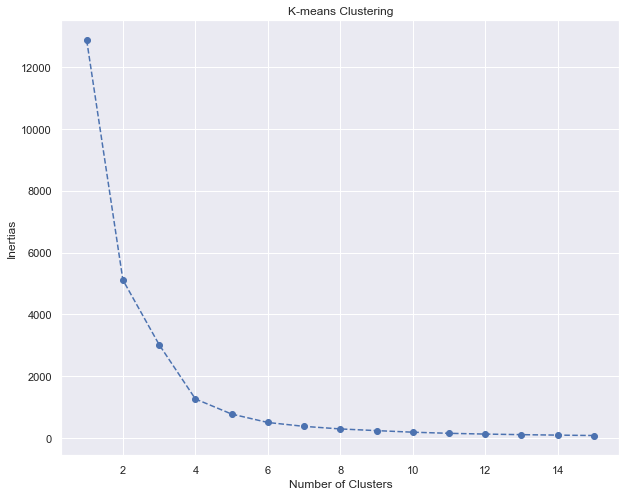

In [46]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a steep in the graphic, after which the descent of inertias isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 16), inertias, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('K-means Clustering')
plt.show()

4 seems to be the number of clusters

In [47]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [48]:
# We divide our data into the four clusters.
kmeans.fit(df_metrics_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## ${\textbf{Interpret Result}}$

In [49]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_metrics1.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [50]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Total Download and Upload,xDR Session,session duration
Segment K-means,,,
0,4.823076e+08,1.855158,2.146015e+05
1,7.445759e+08,1.856081,2.133255e+05
2,2.087834e+08,1.862942,2.128931e+05
3,4.771894e+08,1083.000000,8.123832e+07


On Average, Cluster 1 has the highest value for Total Download and Upload

In [51]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','xDR Session']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [52]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'lower standard'})

,Total Download and Upload,xDR Session,session duration,N Obs,Prop Obs
Segment K-means,,,,,
well-off,4.823076e+08,1.855158,2.146015e+05,54625,0.364167
fewer-opportunities,7.445759e+08,1.856081,2.133255e+05,46283,0.308553
standard,2.087834e+08,1.862942,2.128931e+05,48009,0.320060
lower standard,4.771894e+08,1083.000000,8.123832e+07,1083,0.007220


In [53]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'lower standard', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'well-off'})

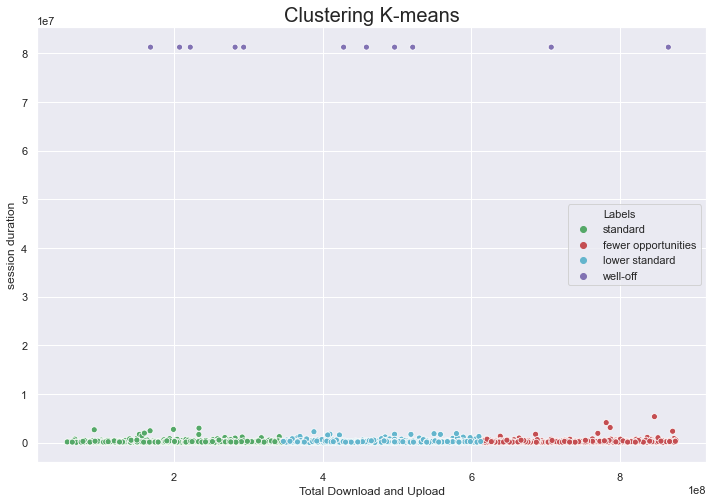

In [54]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
# using a subset of data
test = df_metrics1.sample(1500)
x_axis = test['Total Download and Upload']
y_axis = test['session duration']
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clustering K-means', size=20)
plt.show()

## ${\textbf{Task 3 -  Experience Analytics}}$

The important columns here are the once that deals with the network parameters like -      
Round Trip Time (RTT) ,Throughput , and the customers’ device characteristics like the
handset type to conduct a deep user experience analysis

In [55]:
missing_values_table(df)

Your selected dataframe has 66 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130253,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111842,74.6,float64
Nb of sec with 125000B < Vol DL,97537,65.0,float64
Nb of sec with 31250B < Vol DL < 125000B,93585,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92893,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88316,58.9,float64
TCP DL Retrans. Vol (Bytes),88145,58.8,float64
TCP UL Retrans. Vol (Bytes),88145,58.8,float64
HTTP UL (Bytes),81809,54.5,float64
HTTP DL (Bytes),81473,54.3,float64


#### Fix Missing

Since outliers have been replaced with median, i fill missing values with mean

In [56]:
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())

### Fix Outliers

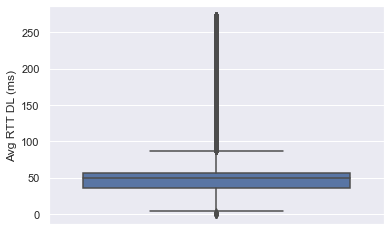

In [57]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['Avg RTT DL (ms)'], orient='vert')

In [58]:
# get total of all experience metrics
df['Total TCP DL and UL'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['Total RTT DL and UL'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Total Bearer TP DL and UL'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

In [59]:
experience_features = ['Total Bearer TP DL and UL', 'Total RTT DL and UL', 'Total TCP DL and UL']

In [60]:
df[experience_features].sort_values(by = 'Total TCP DL and UL', ascending=False)[:10]

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL
143629,16225.0,92.0,31676294.0
114427,51375.0,49.0,31664662.0
89015,9361.0,50.0,31663032.0
114675,27858.0,86.0,31658308.0
140950,2588.0,86.0,31657498.0
76378,61512.0,57.0,31642448.0
114422,33223.0,109.0,31641094.0
68702,19015.0,123.0,31637910.0
1844,7736.0,84.0,31633212.0
2438,45667.0,101.0,31632878.0


>Aggregate per customer,
>> Average TCP retransmission

In [61]:
ave_tcp = df.groupby('MSISDN/Number')['Total TCP DL and UL'].mean().reset_index(name='Average TCP Retransmission').\
            sort_values(by='Average TCP Retransmission', ascending=False)

>> Average RTT

In [62]:
ave_rtt = df.groupby('MSISDN/Number')['Total RTT DL and UL'].mean().reset_index(name='Average RT Time').\
            sort_values(by='Average RT Time', ascending=False)

>>Handset type per Customer

In [63]:
handset_type = df.groupby('MSISDN/Number')['Handset Type'].count().reset_index(name='Handset Type').\
            sort_values(by='Handset Type', ascending=False)

>> Average throughput per customer

In [64]:
ave_tp = df.groupby('MSISDN/Number')['Total Bearer TP DL and UL'].mean().reset_index(name='Average Throughput').\
            sort_values(by='Average Throughput', ascending=False)

### Task 3.2 - Compute & list 10 of the top, bottom and most frequent                           

**Top 10 TCP**

In [65]:
top_10_tcp = ave_tcp[:10]
least_10_tcp = ave_tcp[-10:]
# most_10_tcp = ave_tcp.mode()[:10]
print('Top 10 TCP')
top_10_tcp

Top 10 TCP


,MSISDN/Number,Average TCP Retransmission
23511,3.365014e+10,31663032.0
106738,3.378929e+10,31658308.0
49021,3.366255e+10,31657498.0
46432,3.366196e+10,31642448.0
35093,3.365929e+10,31641094.0
57531,3.366479e+10,31637910.0
71076,3.366911e+10,31633212.0
86209,3.369872e+10,31632878.0
34498,3.365916e+10,31626984.0
57166,3.366470e+10,31616370.0


**Bottom 10 TCP**

In [66]:
print('Bottom 10 TCP')
least_10_tcp

Bottom 10 TCP


,MSISDN/Number,Average TCP Retransmission
95213,3.376151e+10,8.0
100616,3.376394e+10,8.0
100663,3.376399e+10,8.0
87348,3.369906e+10,8.0
71778,3.366933e+10,8.0
71705,3.366931e+10,8.0
95774,3.376162e+10,8.0
95331,3.376154e+10,8.0
95322,3.376154e+10,4.0
56622,3.366454e+10,4.0


**Most 10 TCP**

In [67]:
# print('Most 10 TCP')
# most_10_tcp

**Top 10 RTT**

In [68]:
top_10_rtt = ave_rtt[:10]
least_10_rtt = ave_rtt[-10:]
# most_10_rtt = ave_rtt.mode()[:10]
print('Top 10 RTT')
top_10_rtt

Top 10 RTT


,MSISDN/Number,Average RT Time
61786,3.366606e+10,318.0
82410,3.368795e+10,317.0
43442,3.366125e+10,315.0
97724,3.376243e+10,314.0
96914,3.376204e+10,312.0
40719,3.366060e+10,311.0
37520,3.365983e+10,309.0
35692,3.365942e+10,308.0
47286,3.366215e+10,306.0
12415,3.362454e+10,306.0


**Bottom 10 RTT**

In [69]:
print('Bottom 10 RTT')
least_10_rtt

Bottom 10 RTT


,MSISDN/Number,Average RT Time
74434,3.367220e+10,9.0
3882,3.361085e+10,9.0
21980,3.364768e+10,8.0
69662,3.366862e+10,6.0
66098,3.366748e+10,5.0
36039,3.365949e+10,5.0
83396,3.369505e+10,4.0
39066,3.366020e+10,2.0
44748,3.366158e+10,0.0
28878,3.365298e+10,0.0


**Most RTT**

In [70]:
print('Most 10 RTT')
# most_10_rtt

Most 10 RTT


In [71]:
top_10_tp = ave_tp[:10]
least_10_tp = ave_tp[-10:]
# most_10_tp = ave_tp.mode()[:10]
print('Top 10 TP')
top_10_tp

Top 10 TP


,MSISDN/Number,Average Throughput
89296,3.369967e+10,72416.0
94398,3.376118e+10,71794.0
58043,3.366491e+10,71766.0
79451,3.368207e+10,71635.0
21722,3.364688e+10,71537.0
71240,3.366916e+10,71409.0
86837,3.369891e+10,71130.0
24228,3.365031e+10,70999.0
16793,3.363254e+10,70450.0
36115,3.365951e+10,70344.0


**Bottom 10 Through put**

In [72]:
least_10_tp

,MSISDN/Number,Average Throughput
94744,3.376131e+10,0.0
28745,3.365279e+10,0.0
34096,3.365908e+10,0.0
93060,3.376059e+10,0.0
857,3.360345e+10,0.0
94815,3.376134e+10,0.0
80273,3.368377e+10,0.0
71499,3.366924e+10,0.0
71456,3.366923e+10,0.0
32396,3.365873e+10,0.0


Apparently, Many Customers have an average Throughput of 0.0

**Most 10 Handset Type**

In [73]:
handset_type[:10]

,MSISDN/Number,Handset Type
13526,3.362632e+10,1083
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
76363,3.367588e+10,15
65118,3.366716e+10,13
13994,3.362708e+10,12
1279,3.360452e+10,12
92577,3.376041e+10,12


Am surprised, 1 customer used 1083 diffrent phones. Wow

>> Task 3.3 - Compute & report

>>d. The distribution of the average throughput per handset type and provide interpretation for your findings. 

In [95]:
handset_tp = df.groupby('Handset Type')['Total Bearer TP DL and UL'].mean().reset_index(name='Average TP per Handset').\
                                    sort_values(by='Average TP per Handset', ascending=False)
handset_tp[:10]

,Handset Type,Average TP per Handset
966,Samsung Galaxy S9+,67383.0
124,Asustek Asus Ze550Kl Zenfone2 Laser,62989.0
349,Huawei E8372,58190.0
423,Huawei P9 Plus,56918.0
3,A-Link Telecom I. Cubot Nova,56217.0
1219,Tecno Telecom (H. Phantom6 Plus,54197.0
770,Oppo Cph1877,53058.0
95,Archos Sa 55 Diamond Selfie ( Lite),51797.0
489,Kvd Internationa. Doogee S55 Lite,51389.0
1384,Zte Blade V8 Blade V8,50950.0


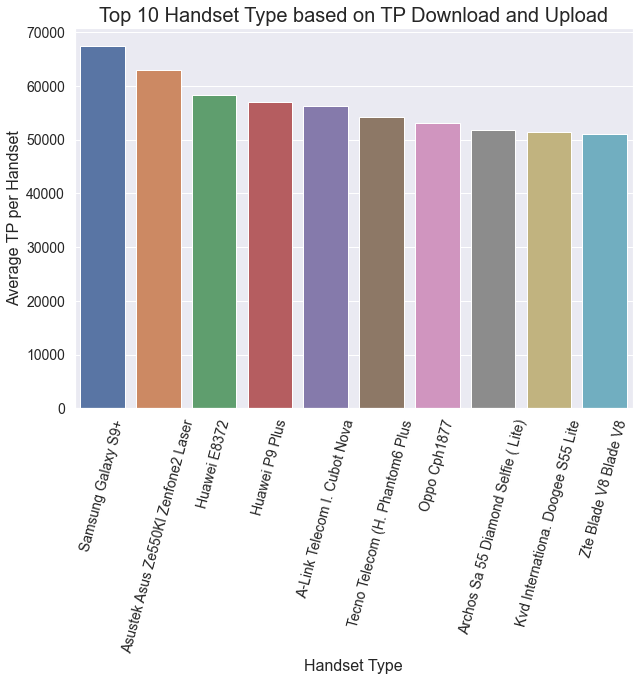

In [97]:
plt.figure(figsize=(10, 7))
sns.barplot(data = handset_tp[:10], x='Handset Type', y='Average TP per Handset')
plt.title('Top 10 Handset Type based on TP Download and Upload', size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel('Handset Type', fontsize=16)
plt.ylabel('Average TP per Handset', fontsize=16)
plt.show()

Huawei B715S-23C leads the chart with $108994.2$ kbps. Handsets with higher TP generally are from China that is the Manufacturers of this Handset are based or originates from China. many diffrent handset type from Huawei has higher value of average TP when compared with other handset.

>> e. The average TCP retransmission view per handset type and provide interpretation for your findings. 


In [92]:
ave_tcp_handset = df.groupby('Handset Type')['Total TCP DL and UL'].mean().reset_index(name='Average TCP per Handset').\
                                    sort_values(by='Average TCP per Handset', ascending=False)
ave_tcp_handset[:10]

,Handset Type,Average TCP per Handset
391,Huawei Maimang 6,27575366.0
362,Huawei Gr5,23868352.0
1030,Sfr Starxtrem7,23361542.0
706,New-Bund Technol. Mix 2,22414358.0
431,Huawei Rvl-Al09,22335128.0
1126,Sony Mobile Comm. Xperia M5 Dual,22167568.0
743,Nubia Technology. Z17 Mini,21829510.0
925,Samsung Galaxy On 7,21505970.0
359,Huawei Frd-L19,19375538.0
570,Lg G2,18928588.0


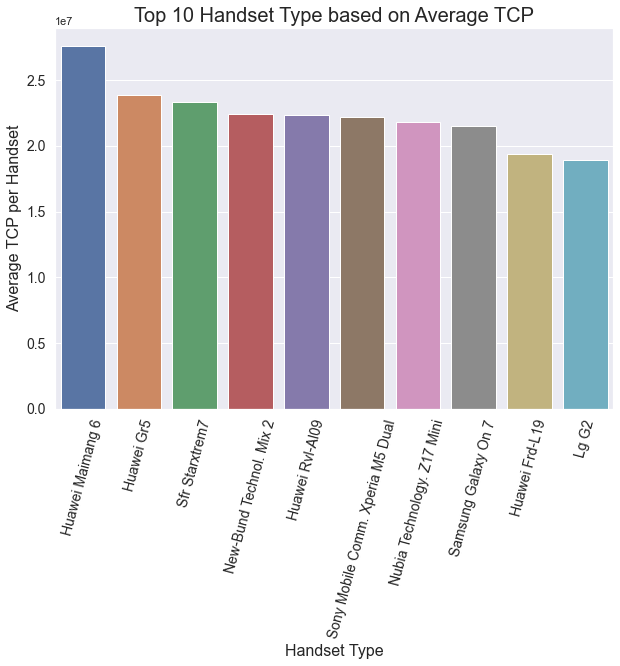

In [76]:
plt.figure(figsize=(10, 7))
sns.barplot(data = ave_tcp_handset[:10], x='Handset Type', y='Average TCP per Handset')
plt.title('Top 10 Handset Type based on Average TCP', size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel('Handset Type', fontsize=16)
plt.ylabel('Average TCP per Handset', fontsize=16)
plt.show()

Interpretation:: Huawei phones seems to have poor connection most times has many of such phone (huawei) has higher retransmission rates

### Task 3.4
>> Using the experience metrics above, perform a ​ k-​means clustering (where ​ k = 3) to segment users into groups of experices and provide a brief description of each cluster                       


In [77]:
df_experience = df[experience_features]
df_experience.head()

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL
0,67.0,47.000000,3.451561e+06
1,42.0,70.000000,3.451561e+06
2,15.0,65.075822,3.451561e+06
3,88.0,65.075822,3.451561e+06
4,15.0,65.075822,3.451561e+06


For Ease of Use and Simplicity, i will standardize the data and convert Handset Type to numerical values by encoding where 1 - Samsung Galaxy A5 Sm-A520F etc. i will also drop MSISDN/Number when doing the clustering has it wont add any value to how it should be clustered.

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_exp = df_experience.copy()
X = scaler.fit_transform(df_exp)

In [79]:
# initialize kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=21)

In [80]:
# divide into 3 cluster
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

#### ${\textbf{Interpret Result}}$

In [81]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_exp.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [82]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL
Segment K-means,,,
0,1808.097017,51.839579,2.958156e+06
1,28958.910246,107.071816,1.873191e+07
2,33498.832592,102.970907,2.128151e+06


In [83]:
df_segm_analysis

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL
Segment K-means,,,
0,1808.097017,51.839579,2.958156e+06
1,28958.910246,107.071816,1.873191e+07
2,33498.832592,102.970907,2.128151e+06


In [98]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'not-so-rich', 
                                                                  1:'standard',
                                                                  2:'fewer opportunities', 
                                                                  })

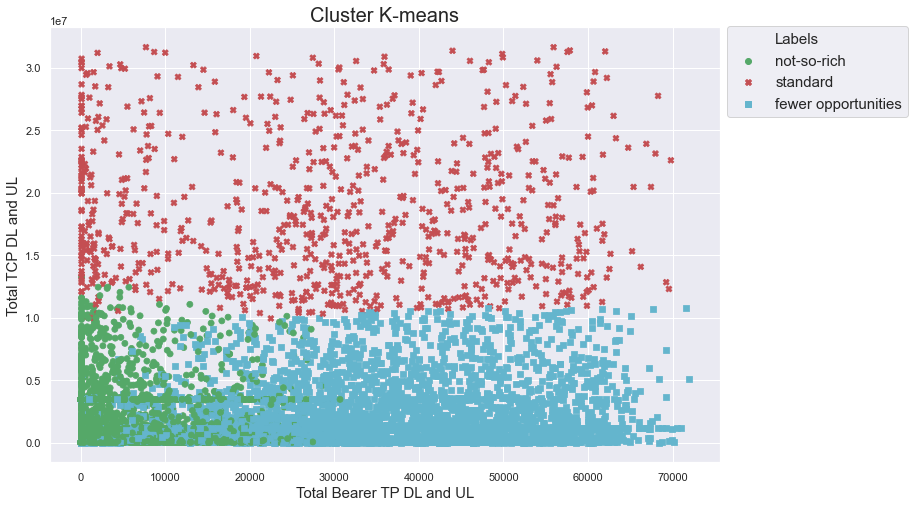

In [99]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
# using a subset of data
test = df_exp.sample(20000)
x_axis = test['Total Bearer TP DL and UL']
y_axis = test['Total TCP DL and UL']
plt.figure(figsize = (12, 8))
markers = {'well-off': 's', 'standard':'X'}
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c'],
               hue_norm=(2,3,5), marker='+', style=df_segm_kmeans['Labels'])
plt.title('Cluster K-means', size=20)
plt.xlabel('Total Bearer TP DL and UL', fontsize=15)
plt.ylabel('Total TCP DL and UL', fontsize=15)
plt.legend(bbox_to_anchor=(1, 1.02), fontsize=15)
plt.show()

 1. TP - Throughput -- amount of data that is being sent to a system
 2. TCP - Transmission Control Protocol -- packets detected as retransmitted<br><br><br>
 
 The customers grouped into Cluster 1 and 0 sends large amount of data through the system and most times it reach it destination succesfully with little or no retransmission required. Cluster 2 data transmission are often retransmitted. This maybe due to poor connection which slows data transmission down. Cluster 1 sends more data than cluster 0

# ${\textbf{Task 4 Satisfaction Analysis}}$

**Engagement Score for each User**

In [86]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=221)
kmeans.fit(df_metrics_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=221, tol=0.0001, verbose=0)

In [87]:
df_metrics_norm['Cluster K-means'] = kmeans.labels_
df_metrics_norm.groupby('Cluster K-means').mean()

,Total Download and Upload,xDR Session,session duration
Cluster K-means,,,
0,0.734649,0.000789,0.002543
1,0.277976,0.000797,0.002542
2,0.529603,1.000000,1.000000


In [88]:
# def k_mean_distance(data, centroid_matrix, i_centroid, cluster_labels):
#     distance = [np.linalg.norm(x-centroid_matrix) for x in data[cluster_labels] == i_centroid]
#     return distance

# clusters = kmeans.predict(df_metrics_norm)
# centroids = kmeans.cluster_centers_[2]

# distances = []
# for cent_features in centroids:
#     distance = k_mean_distance(df_kmeans, cent_features, 2, 'Cluster K-means')
#     distances.append(distance)

In [89]:
import scipy.spatial.distance as sdist
data = pd.DataFrame({'Type1': [0.0,0.0,473.6, 0.0, 0.0],
                    'Type2': [0.0, 63.72, 174.0, 996.0, 524.9],
                    'Type3': [0.0, 0.0, 31.6, 160.92, 0.0],
                    'id': [1000, 10001, 10002, 10003, 10004]})
points = data.drop('id', axis=1)
k_means = KMeans(n_clusters=5, random_state=0).fit(points)
data['cluster'] = k_means.labels_
centroids = k_means.cluster_centers_
dists = pd.DataFrame(sdist.cdist(points, centroids),
                    columns=['dist_{}'.format(i) for i in range(len(centroids))],
                    index=data.index)
data = pd.concat([data, dists], axis=1)

data

,Type1,Type2,Type3,id,cluster,dist_0,dist_1,dist_2,dist_3,dist_4
0,0.0,0.00,0.00,1000,4,524.900000,6.372000e+01,1008.915877,505.540819,0.000000
1,0.0,63.72,0.00,10001,1,461.180000,2.842171e-14,946.066195,487.295802,63.720000
2,473.6,174.00,31.60,10002,3,590.276486,4.872958e+02,957.446929,0.000000,505.540819
3,0.0,996.00,160.92,10003,2,497.825729,9.460662e+02,0.000000,957.446929,1008.915877
4,0.0,524.90,0.00,10004,0,0.000000,4.611800e+02,497.825729,590.276486,524.900000


In [ ]:
kmeans_eng.cluster_centers_

In [110]:
from scipy.spatial import distance as sdist
df_metrics1 = df[['Total Download and Upload', 'xDR Session', 'session duration']]
df_metric_norm = pd.DataFrame(scaler.fit_transform(df_metrics1), columns=df_metrics1.columns)
kmeans_eng = KMeans(n_clusters=3, random_state=21).fit(df_metric_norm)
# df_metric_norm['Cluster'] = kmeans_eng.labels_
# centroids = kmeans_eng.cluster_centers_
# dists = pd.DataFrame(sdist.cdist(df_metrics1, centroids),
#                     columns=['dist_{}'.format(i) for i in range(len(centroids))],
#                     index=df_metrics1.index)
# df_metrics1 = pd.concat([df_metrics1, dists], axis=1)

# df_metrics1.head()

In [101]:
df_metrics1.head(2)

,Total Download and Upload,xDR Session,session duration
0,345629377.0,2,2083209.0
1,707185356.0,2,1698167.0


In [111]:
from scipy.spatial import distance
engagement_score = []
# select the least cluster
centroids_eng = kmeans_eng.cluster_centers_[:,1]
for i in df_metrics1.index:
    row = df_metrics1.iloc[i][1]
    engagement_score.append(distance.euclidean(row, centroids_eng))

In [112]:
engagement_score[:8]

[10.16235785706391,
 10.16235785706391,
 10.834324049884692,
 10.834324049884692,
 10.834324049884692,
 9.755227153282865,
 10.834324049884692,
 10.16235785706391]

**Experience score to each user**

In [104]:
df_exp.head(2)

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL
0,67.0,47.0,3.451561e+06
1,42.0,70.0,3.451561e+06


variable X is the standardized experience dataframe

In [105]:
# scale df_exp
df_exp_scaled = pd.DataFrame(scaler.fit_transform(df_exp), columns=df_exp.columns)

# initialize kmeans and fit
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=21)
kmeans.fit(df_exp_scaled)
df_exp_scaled['Labels'] = kmeans.labels_
df_exp_scaled.head(3)

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL,Labels
0,-0.585221,-0.448287,-1.211138e-16,0
1,-0.586738,0.122121,-1.211138e-16,0
2,-0.588377,0.000000,-1.211138e-16,0


In [ ]:
# which cluster has the least experience?
df_exp_scaled['Labels'].value_counts().plot.bar(figsize=(9,6),color=['c', 'grey','m', 'r'], title='Clsuter Distribution')
plt.show()

In [106]:
df_exp_scaled.groupby('Labels').mean()

,Total Bearer TP DL and UL,Total RTT DL and UL,Total TCP DL and UL
Labels,,,
0,-0.493056,-0.326129,-0.122295
1,0.410766,2.930414,-0.222381
2,1.173701,0.935037,4.096773
3,1.775330,0.163967,-0.363031


In [113]:
# select the least cluster or cluster with the worst experience
centroids = kmeans.cluster_centers_
centroids

array([[-0.49303947, -0.32610866, -0.12230858],
       [ 0.4105234 ,  2.93171453, -0.22218768],
       [ 1.17373646,  0.93514788,  4.09754209],
       [ 1.77511877,  0.16439526, -0.36284634]])

In [109]:
centroids[1,:]

array([ 0.4105234 ,  2.93171453, -0.22218768])

In [ ]:
np.mean(centroids, 0)

In [114]:
experience_score = []
least_centroids = kmeans.cluster_centers_[0,:]
for i in df_exp.index:
    row = df_exp.iloc[i][1]
    experience_score.append(distance.euclidean(row, least_centroids))

In [115]:
experience_score[:5]

[81.9503589066524,
 121.7873898792481,
 113.25848502561021,
 113.25848502561021,
 113.25848502561021]

### Task 4.1

In [116]:
df['Engagement Score'] = engagement_score
df['Experience Score'] = experience_score


In [138]:
df['Start'] = pd.to_datetime(df['Start'])
df['Start'].min(), df['Start'].max()

(Timestamp('2019-04-04 12:01:00'), Timestamp('2019-12-04 21:41:00'))

In [117]:
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Download and Upload,Total Session Social Media,Total Session Email,Total Session Youtube,Total Session Netflix,Total Session Google,Total Session Gaming,Total Session Other,Total duration all session,xDR Session,session duration,Total TCP DL and UL,Total RTT DL and UL,Total Bearer TP DL and UL,Engagement Score,Experience Score
0,1.311450e+19,04/04/2019 12:01,770.0,25/04/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,42.0,5.0,23.0,44.0,1.725781e+06,1.725781e+06,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,1570185.0,3701304.0,18355943.0,17855187.0,2905912.0,292426453.0,180558843.0,5.173738e+08,2,2083209.0,3.451561e+06,47.0,67.0,10.162358,81.950359
1,1.311450e+19,09/04/2019 13:04,235.0,25/04/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.0,5.0,16.0,26.0,1.725781e+06,1.725781e+06,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,1933278.0,937385.0,39359124.0,35565545.0,4414096.0,609920783.0,541959383.0,1.234090e+09,2,1698167.0,3.451561e+06,70.0,42.0,10.162358,121.787390


In [118]:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2
df['Satisfaction Score'].head()

0    46.056358
1    65.974874
2    62.046405
3    62.046405
4    62.046405
Name: Satisfaction Score, dtype: float64

**Top 10 Satisfied Customer**

In [119]:
top_10_customer = df.groupby('MSISDN/Number')['Satisfaction Score'].mean().reset_index(name='Satisfaction Score').\
            sort_values(by='Satisfaction Score', ascending=False)[:10]
top_10_customer

,MSISDN/Number,Satisfaction Score
13526,3.362632e+10,1004.982338
61786,3.366606e+10,281.085047
82410,3.368795e+10,280.219022
43442,3.366125e+10,278.486971
97724,3.376243e+10,277.620946
96914,3.376204e+10,275.888895
40719,3.366060e+10,275.022870
37520,3.365983e+10,273.290819
35692,3.365942e+10,272.424794
32478,3.365874e+10,270.692743


In [140]:
df[df['MSISDN/Number'] == 3.362632e+10]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Download and Upload,Total Session Social Media,Total Session Email,Total Session Youtube,Total Session Netflix,Total Session Google,Total Session Gaming,Total Session Other,Total duration all session,xDR Session,session duration,Total TCP DL and UL,Total RTT DL and UL,Total Bearer TP DL and UL,Engagement Score,Experience Score,Satisfaction Score


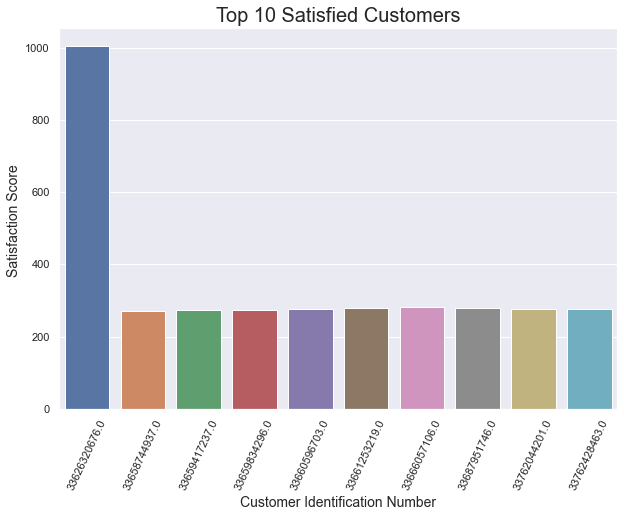

In [120]:
plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_customer, x = 'MSISDN/Number',  y='Satisfaction Score')
plt.title('Top 10 Satisfied Customers', size=20)
plt.xticks(rotation=65)
plt.xlabel('Customer Identification Number', fontsize=14)
plt.ylabel('Satisfaction Score ', fontsize=14)
plt.show()

### Task 4.3 Run a Regression model to predict the Satisfaction score of customer

In [121]:
features = []
features.extend(df_experience.columns)
features.extend(df_metrics1.columns)
features

['Total Bearer TP DL and UL',
 'Total RTT DL and UL',
 'Total TCP DL and UL',
 'Total Download and Upload',
 'xDR Session',
 'session duration']

In [122]:
X = df[features]
X_scaled = scaler.fit_transform(X)
y = df['Satisfaction Score']
X_scaled[:4]

array([[-5.85221380e-01, -4.48287092e-01, -1.21113790e-16,
        -5.74791629e-01, -8.37189095e-02,  1.86941648e-01],
       [-5.86738452e-01,  1.22121436e-01, -1.21113790e-16,
         1.02356224e+00, -8.37189095e-02,  1.30906454e-01],
       [-5.88376891e-01,  0.00000000e+00, -1.21113790e-16,
        -7.42508382e-01, -9.46428519e-02,  8.19494069e-02],
       [-5.83947039e-01,  0.00000000e+00, -1.21113790e-16,
         9.37682227e-02, -9.46428519e-02,  7.60913844e-02]])

In [123]:
from sklearn.model_selection import train_test_split
# split the data so you can evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 6)
(30000, 6)
(120000,)
(30000,)


In [124]:
from sklearn.linear_model import LinearRegression
# fit the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
# predict and evaluate
def rmse(true, pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(true, pred))

In [126]:
# predict on test set
y_pred = lr.predict(X_test)
rmse(y_test, y_pred)

1.0979183224604891

In [129]:
# Another Regression Model GradientBoosting Regressor
model_grb = GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, random_state=21)
model_grb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
# predict on test set
y_pred_grb = model_grb.predict(X_test)
rmse(y_test, y_pred_grb)

0.976400438064632

Text(0, 0.5, 'Predicted Value')

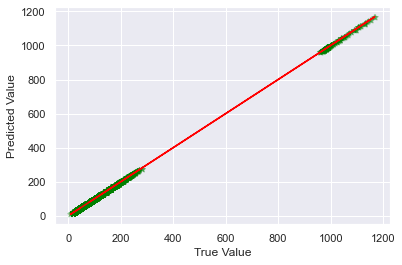

In [132]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred_grb, alpha=0.3, color='green', marker='*')
plt.plot(y_test, y_test, color='red') # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [133]:
y_pred[:5]

array([79.07828806, 98.61719692, 36.83492324, 61.32503809, 61.38276845])

If RMSE is closer to 0 then the model is a good model base on the reported RMSE- Root Mean Squared Error which is 0.9764 the model is fairly good

### Task 4.4 Run a K-means on the engagement and experience score

In [134]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=21)

In [135]:
df_exp_eng = df[['Experience Score', 'Engagement Score']]
df_exp_eng.head()

,Experience Score,Engagement Score
0,81.950359,10.162358
1,121.787390,10.162358
2,113.258485,10.834324
3,113.258485,10.834324
4,113.258485,10.834324


Since the 2 columns are in the same scale no need for Scaling or Normalizing

In [136]:
kmeans.fit(df_exp_eng)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

### Task 4.5 Aggregate the average satisfaction & experience score per cluster

In [137]:
df_exp_eng['Cluster'] = kmeans.labels_
df_exp_eng.groupby('Cluster').mean()

,Experience Score,Engagement Score
Cluster,,
0,113.058285,10.466982
1,140.799788,1869.164888


#### Task 4.6 Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database

In [141]:
df_sql = df[['MSISDN/Number', 'Engagement Score', 'Experience Score', 'Satisfaction Score']]
df_sql.head(7)

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.366496e+10,10.162358,81.950359,46.056358
1,3.368185e+10,10.162358,121.787390,65.974874
2,3.376063e+10,10.834324,113.258485,62.046405
3,3.375034e+10,10.834324,113.258485,62.046405
4,3.369980e+10,10.834324,113.258485,62.046405
5,3.366819e+10,9.755227,113.258485,61.506856
6,3.366537e+10,10.834324,185.873172,98.353748


In [142]:
# import sqlite library to save into sql db
import sqlite3

# create connection while creating a data base called 'userDB.db'
con = sqlite3.connect('user_scoreDB.db')
# create a pen to write to the db using cursor method
c = con.cursor()

In [ ]:
# create table in the sql userDB  here table is called 'user_score'
c.execute('CREATE TABLE user_score (Customer_Number, Engagement_Score, Experience_Score, Satisfaction_Score)')
con.commit()

In [ ]:
# convert Dataframe to SQL
df_sql.to_sql('user_score', con, if_exists='replace', index=False)
print('Dataframe converted to sql and saved Succesfully...!!!')

In [143]:
c.execute("""
        SELECT * FROM user_score
        """)
# for row in c.fetchall():
#     print(row)

In [144]:
# convert the sql back to dataframe
sql_df = pd.DataFrame(c.fetchall(), columns=df_sql.columns)
sql_df.head(6)

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.366496e+10,0.945494,0.538447,0.741970
1,3.368185e+10,0.441621,0.540743,0.491182
2,3.376063e+10,1.010053,0.543225,0.776639
3,3.375034e+10,0.434334,0.536521,0.485427
4,3.369980e+10,0.544386,0.543225,0.543806
5,3.366819e+10,0.404953,0.533225,0.469089


In [ ]:
con.close()
print('Connection to DB closed')